In [193]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data_path = os.path.join("..", "data")

train = pd.read_csv(os.path.join(data_path, "train.csv"))
test = pd.read_csv(os.path.join(data_path, "test.csv"))

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (14000, 12)
Test shape: (6000, 11)


In [194]:
train.head()
train.info() #show data types, non-null counts, and memory usage
train.describe() #show summary statistics for numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 14000 non-null  object 
 1   Residents                 14000 non-null  int64  
 2   Apartment_Type            13574 non-null  object 
 3   Temperature               13559 non-null  float64
 4   Humidity                  14000 non-null  object 
 5   Water_Price               14000 non-null  float64
 6   Period_Consumption_Index  14000 non-null  float64
 7   Income_Level              13574 non-null  object 
 8   Guests                    14000 non-null  int64  
 9   Amenities                 8003 non-null   object 
 10  Appliance_Usage           13585 non-null  float64
 11  Water_Consumption         14000 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 1.3+ MB


,Residents,Temperature,Water_Price,Period_Consumption_Index,Guests,Appliance_Usage,Water_Consumption
count,14000.000000,13559.000000,14000.000000,14000.000000,14000.000000,13585.000000,14000.000000
mean,2.078429,22.566559,0.657924,1.152890,0.292929,0.201987,164.461230
std,9.241665,7.216447,8.765776,0.229047,0.489164,0.401498,72.873894
min,-99.000000,10.000000,-99.000000,-0.130782,-2.000000,0.000000,35.540000
25%,2.000000,16.340000,1.320000,0.970000,0.000000,0.000000,109.550000
50%,3.000000,22.580000,1.630000,1.150000,0.000000,0.000000,150.375000
75%,4.000000,28.850000,2.112500,1.330000,1.000000,0.000000,206.765000
max,5.000000,35.000000,3.000000,2.352311,3.000000,1.000000,531.490000


In [195]:
print("missing vals: ")
print(train.isnull().sum().sort_values(ascending=False))
print("unique values in object columns: ")
print(train.select_dtypes('object').nunique())

missing vals: 
Amenities                   5997
Temperature                  441
Income_Level                 426
Apartment_Type               426
Appliance_Usage              415
Residents                      0
Timestamp                      0
Humidity                       0
Period_Consumption_Index       0
Water_Price                    0
Guests                         0
Water_Consumption              0
dtype: int64
unique values in object columns: 
Timestamp         14000
Apartment_Type        7
Humidity           4515
Income_Level        420
Amenities             4
dtype: int64


distribution plots for numeric columns:


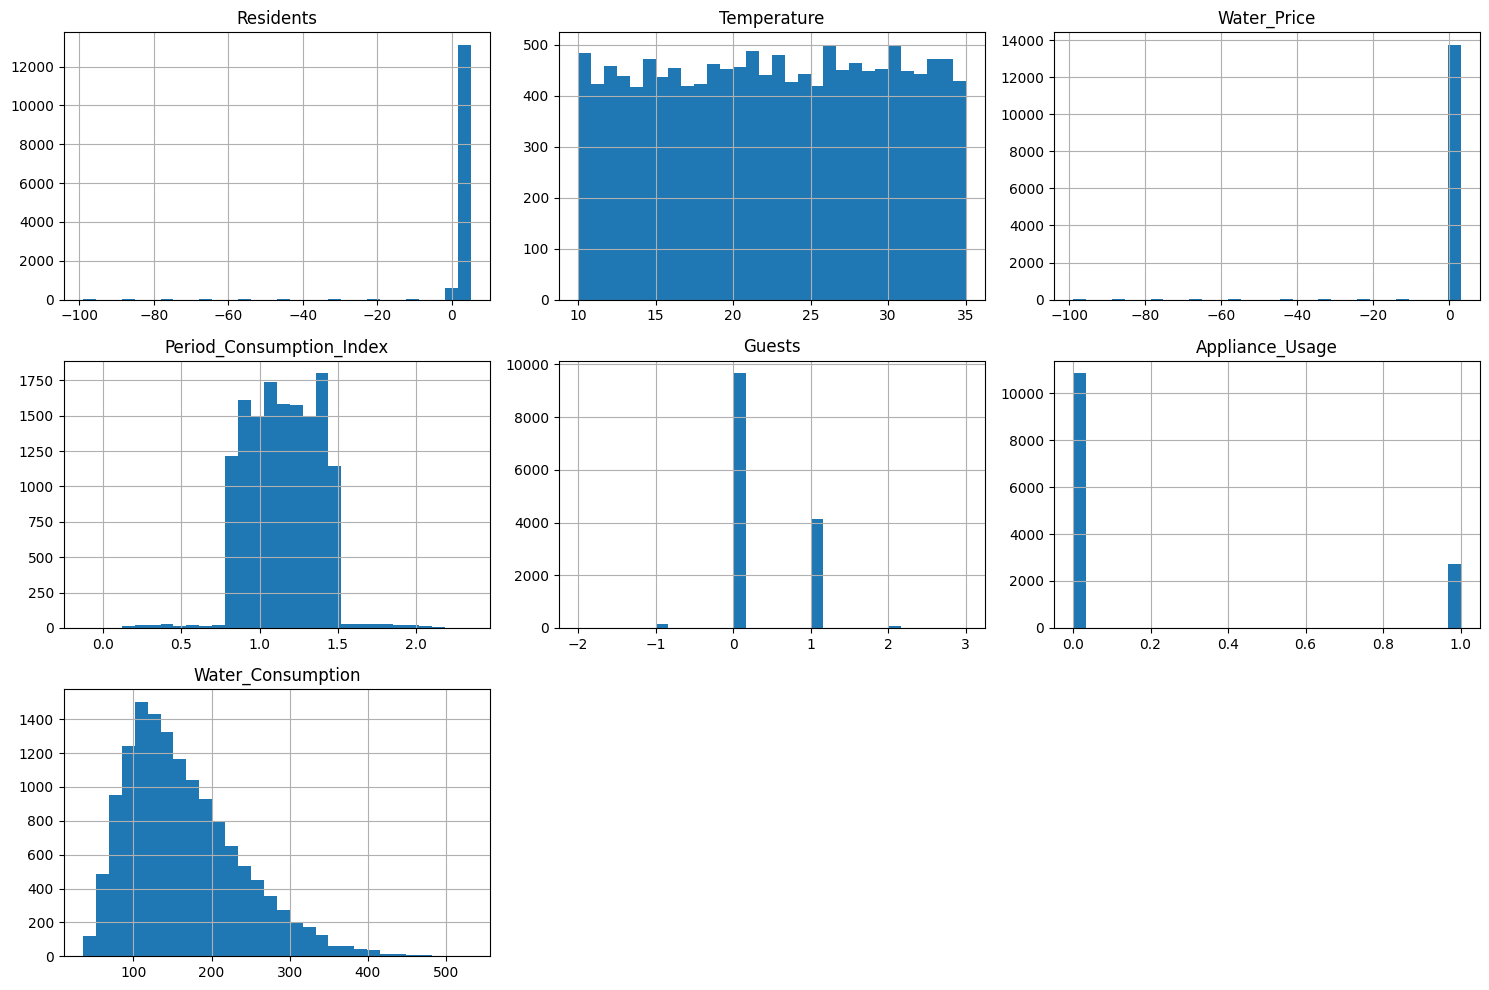

In [196]:
import matplotlib.pyplot as plt
print("distribution plots for numeric columns:")
num_cols = train.select_dtypes(include='number').columns
train[num_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

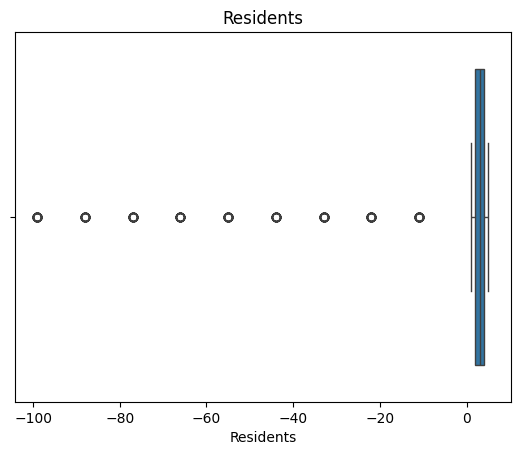

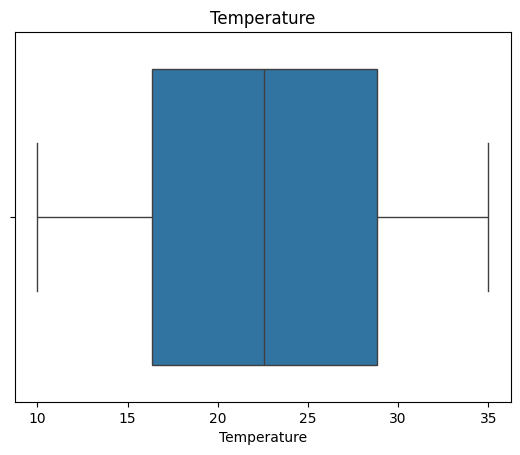

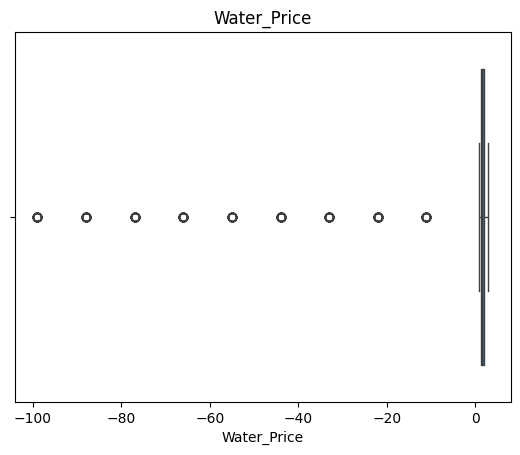

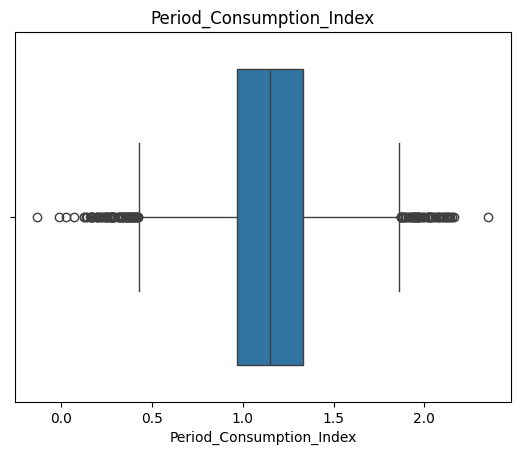

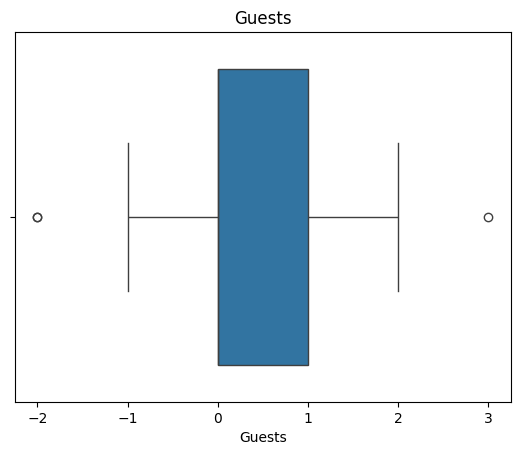

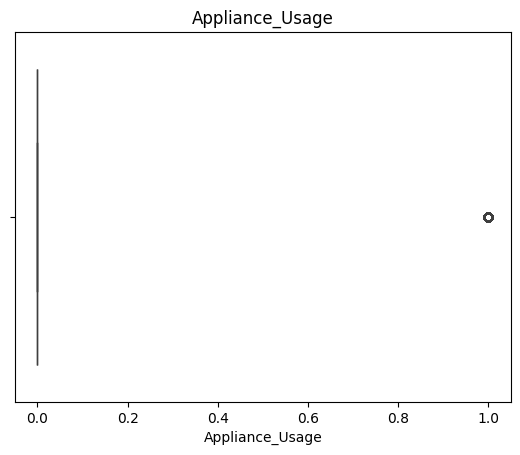

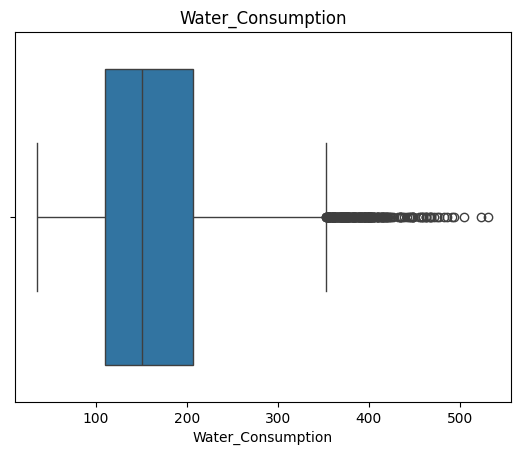

In [197]:
import matplotlib.pyplot as plt
for col in num_cols:
    plt.figure()
    sns.boxplot(x=train[col])
    plt.title(col)
    plt.show()

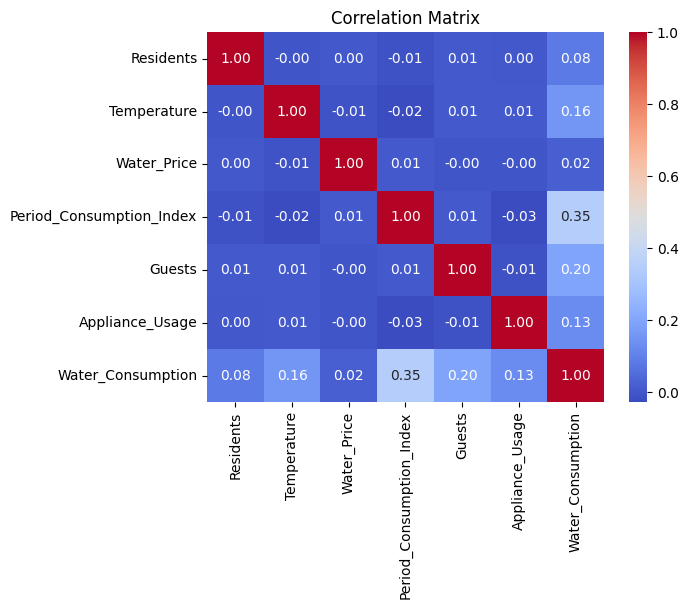

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(train[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [199]:
for col in ['Apartment_Type', 'Income_Level', 'Amenities', 'Appliance_Usage']:
    print(f"{col} → {train[col].nunique()} unique values")
    print(train[col].value_counts(dropna=False), "\n")

Apartment_Type → 7 unique values
Apartment_Type
2BHK        3157
1BHK        3019
Bungalow    1925
3BHK        1909
Cottage     1824
Studio      1186
Detached     554
NaN          426
Name: count, dtype: int64 

Income_Level → 420 unique values
Income_Level
Middle          5323
Upper Middle    3966
Low             2276
Rich            1593
NaN              426
                ... 
!4Wx{              1
qZrsg              1
v`o/f              1
g:%Wi              1
+k*e"              1
Name: count, Length: 421, dtype: int64 

Amenities → 4 unique values
Amenities
NaN              5997
Garden           2627
Swimming Pool    2086
Fountain         1648
Jacuzzi          1642
Name: count, dtype: int64 

Appliance_Usage → 2 unique values
Appliance_Usage
0.0    10841
1.0     2744
NaN      415
Name: count, dtype: int64 



In [200]:
#FILL MISSING VALUES
train['Temperature'] = train['Temperature'].fillna(train['Temperature'].median())
train['Humidity'] = pd.to_numeric(train['Humidity'], errors='coerce')
train['Humidity'] = train['Humidity'].fillna(train['Humidity'].median())

In [201]:
train['Apartment_Type'] = train['Apartment_Type'].fillna('Unknown')
train['Amenities'] = train['Amenities'].fillna('Unknown')
train['Appliance_Usage'] = train['Appliance_Usage'].fillna(-1)
valid_income_levels = ["Low", "Middle", "Upper Middle", "Rich"]
train['Income_Level'] = train['Income_Level'].apply(lambda x: x if x in valid_income_levels else "Unknown")

In [ ]:
income_map = {"Low": 0, "Middle": 1, "Upper Middle": 2, "Rich": 3, "Unknown": -1}
train['Income_Level_Ordinal'] = train['Income_Level'].map(income_map)

train.drop(columns=['Income_Level'], inplace=True)

In [202]:
#train['Apartment_Type_Unknown'] = (train['Apartment_Type'] == 'Unknown').astype(int)
#train['Amenities_Unknown'] = (train['Amenities'] == 'Unknown').astype(int)
#train['Income_Level_Unknown'] = (train['Income_Level'] == 'Unknown').astype(int)

In [203]:
suspicious_cols_flag = ['Residents', 'Water_Price', 'Guests', 'Humidity'] 
for col in suspicious_cols_flag:
    train[f'{col}_Suspicious'] = (pd.to_numeric(train[col], errors='coerce') < 0).astype(int)

suspicious_cols_to_median = ['Residents', 'Water_Price', 'Guests', 'Humidity'] 
for col in suspicious_cols_to_median:
    median_val = pd.to_numeric(train.loc[train[col] >= 0, col], errors='coerce').median()
    train.loc[train[col] < 0, col] = median_val


In [204]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 14000 non-null  object 
 1   Residents                 14000 non-null  int64  
 2   Apartment_Type            14000 non-null  object 
 3   Temperature               14000 non-null  float64
 4   Humidity                  14000 non-null  float64
 5   Water_Price               14000 non-null  float64
 6   Period_Consumption_Index  14000 non-null  float64
 7   Income_Level              14000 non-null  object 
 8   Guests                    14000 non-null  int64  
 9   Amenities                 14000 non-null  object 
 10  Appliance_Usage           14000 non-null  float64
 11  Water_Consumption         14000 non-null  float64
 12  Residents_Suspicious      14000 non-null  int64  
 13  Water_Price_Suspicious    14000 non-null  int64  
 14  Guests

,Residents,Temperature,Humidity,Water_Price,Period_Consumption_Index,Guests,Appliance_Usage,Water_Consumption,Residents_Suspicious,Water_Price_Suspicious,Guests_Suspicious,Humidity_Suspicious
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.00000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.0
mean,3.237643,22.566983,58.691032,1.759144,1.152890,0.30400,0.166357,164.461230,0.020000,0.019429,0.010929,0.0
std,1.115911,7.101870,656.312479,0.533156,0.229047,0.47044,0.444952,72.873894,0.140005,0.138031,0.103971,0.0
min,1.000000,10.000000,10.000000,1.000000,-0.130782,0.00000,-1.000000,35.540000,0.000000,0.000000,0.000000,0.0
25%,2.000000,16.517500,46.440000,1.350000,0.970000,0.00000,0.000000,109.550000,0.000000,0.000000,0.000000,0.0
50%,3.000000,22.580000,53.250000,1.640000,1.150000,0.00000,0.000000,150.375000,0.000000,0.000000,0.000000,0.0
75%,4.000000,28.660000,59.782500,2.112500,1.330000,1.00000,0.000000,206.765000,0.000000,0.000000,0.000000,0.0
max,5.000000,35.000000,77700.000000,3.000000,2.352311,3.00000,1.000000,531.490000,1.000000,1.000000,1.000000,0.0


In [205]:
#FEATURE ENGINEERING




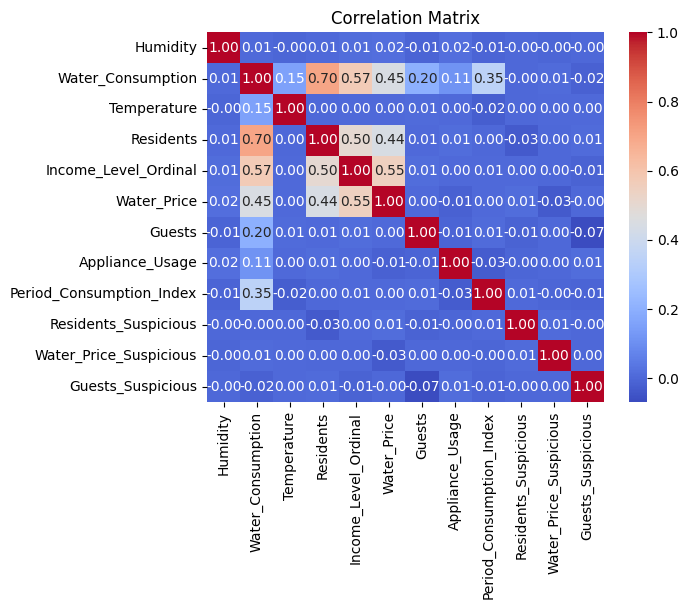

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = train.select_dtypes(include='number').columns
top_n = train[num_cols].var().sort_values(ascending=False).head(12).index
sns.heatmap(train[top_n].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [207]:
target = 'Water_Consumption'
correlations = train[num_cols].corr()[target].sort_values(ascending=False)
print(correlations)

Water_Consumption           1.000000
Residents                   0.702170
Income_Level_Ordinal        0.573578
Water_Price                 0.446403
Period_Consumption_Index    0.348025
Guests                      0.199490
Temperature                 0.153560
Appliance_Usage             0.112379
Water_Price_Suspicious      0.010058
Humidity                    0.006763
Residents_Suspicious       -0.000498
Guests_Suspicious          -0.016342
Humidity_Suspicious              NaN
Name: Water_Consumption, dtype: float64


<Axes: >

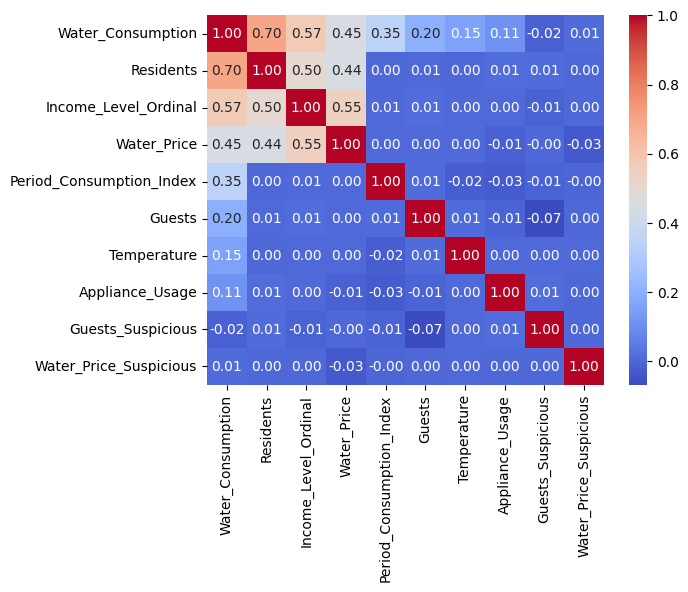

In [208]:
top_corr_features = correlations.abs().sort_values(ascending=False).head(10).index
sns.heatmap(train[top_corr_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')


In [209]:
# Get non-numeric columns
non_numeric_cols = train.select_dtypes(exclude='number').columns

# Print unique values for each non-numeric column
for col in non_numeric_cols:
    print(f"\n{col} (n = {train[col].nunique(dropna=False)}):")
    print(train[col].value_counts(dropna=False))



Timestamp (n = 14000):
Timestamp
06/10/2014 00    1
05/10/2014 16    1
05/10/2014 08    1
05/10/2014 00    1
04/10/2014 16    1
                ..
02/01/2002 08    1
02/01/2002 00    1
01/01/2002 16    1
01/01/2002 08    1
01/01/2002 00    1
Name: count, Length: 14000, dtype: int64

Apartment_Type (n = 8):
Apartment_Type
2BHK        3157
1BHK        3019
Bungalow    1925
3BHK        1909
Cottage     1824
Studio      1186
Detached     554
Unknown      426
Name: count, dtype: int64

Amenities (n = 5):
Amenities
Unknown          5997
Garden           2627
Swimming Pool    2086
Fountain         1648
Jacuzzi          1642
Name: count, dtype: int64


In [210]:
#one hot encode categorical vars
train = pd.get_dummies(train, columns=['Apartment_Type', 'Amenities'], drop_first=False)

train.drop(columns=[
    'Apartment_Type_Unknown',
    'Amenities_Unknown'
], inplace=True)

train = train.astype({col: 'int' for col in train.columns if col.startswith('Apartment_Type_') or col.startswith('Amenities_')})

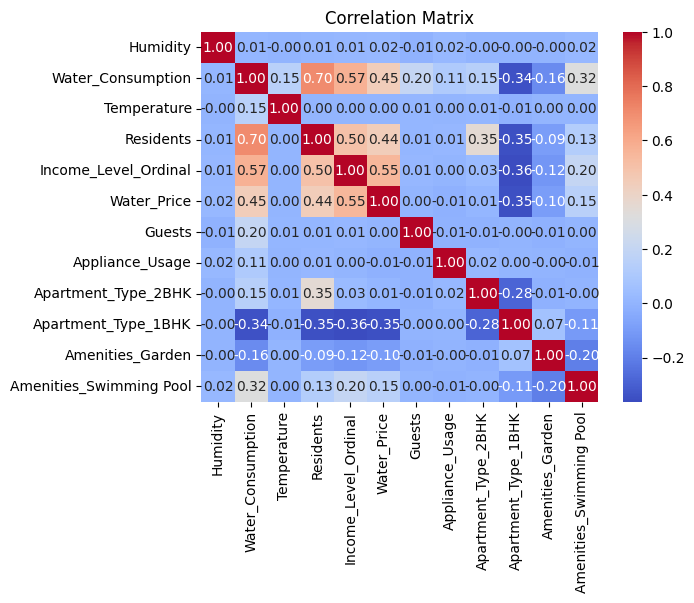

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = train.select_dtypes(include='number').columns
top_n = train[num_cols].var().sort_values(ascending=False).head(12).index
sns.heatmap(train[top_n].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [212]:
train['Timestamp'] = pd.to_datetime(train['Timestamp'], format='%d/%m/%Y %H')

#train['Year'] = train['Timestamp'].dt.year
train['Month'] = train['Timestamp'].dt.month
#train['Day'] = train['Timestamp'].dt.day
train['Hour'] = train['Timestamp'].dt.hour
train['DayOfWeek'] = train['Timestamp'].dt.dayofweek + 1



In [213]:
# Define seasons based on month
train['is_spring'] = train['Month'].isin([3, 4, 5]).astype(int)
train['is_summer'] = train['Month'].isin([6, 7, 8]).astype(int)
train['is_fall']   = train['Month'].isin([9, 10, 11]).astype(int)
train['is_winter'] = train['Month'].isin([12, 1, 2]).astype(int)


train['warm_with_pool'] = (
    ((train['is_summer'] == 1) | (train['is_spring'] == 1)) & 
    (train['Amenities_Swimming Pool'] == 1)
).astype(int)

train['cold_with_jacuzzi'] = (
    ((train['is_fall'] == 1) | (train['is_winter'] == 1)) & 
    (train['Amenities_Jacuzzi'] == 1)
).astype(int)



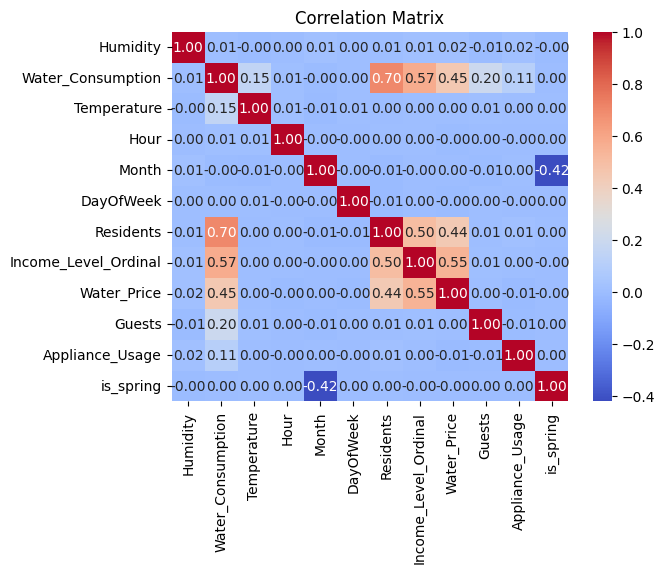

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = train.select_dtypes(include='number').columns
top_n = train[num_cols].var().sort_values(ascending=False).head(12).index
sns.heatmap(train[top_n].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [215]:
# Get non-numeric columns
non_numeric_cols = train.select_dtypes(exclude='number').columns

# Print unique values for each non-numeric column
for col in non_numeric_cols:
    print(f"\n{col} (n = {train[col].nunique(dropna=False)}):")
    print(train[col].value_counts(dropna=False))



Timestamp (n = 14000):
Timestamp
2014-10-06 00:00:00    1
2014-10-05 16:00:00    1
2014-10-05 08:00:00    1
2014-10-05 00:00:00    1
2014-10-04 16:00:00    1
                      ..
2002-01-02 08:00:00    1
2002-01-02 00:00:00    1
2002-01-01 16:00:00    1
2002-01-01 08:00:00    1
2002-01-01 00:00:00    1
Name: count, Length: 14000, dtype: int64


In [216]:
train['high_temp_x_income'] = train['Temperature'] * (
    train['Income_Level_Ordinal'].isin([3, 4]).astype(int)
)
train['warm_with_garden'] = (
    ((train['is_spring'] == 1) | (train['is_summer'] == 1)) &
    (train['Amenities_Garden'] == 1)
).astype(int)


train['weekend_pool_hot'] = (
    (train['DayOfWeek'].isin([6, 7])) &  # Saturday = 6, Sunday = 7
    (train['Amenities_Swimming Pool'] == 1) &
    (train['Temperature'] > 27)
).astype(int)


In [217]:
train.describe()

,Timestamp,Residents,Temperature,Humidity,Water_Price,Period_Consumption_Index,Guests,Appliance_Usage,Water_Consumption,Residents_Suspicious,...,DayOfWeek,is_spring,is_summer,is_fall,is_winter,warm_with_pool,cold_with_jacuzzi,high_temp_x_income,warm_with_garden,weekend_pool_hot
count,14000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.00000,14000.000000,14000.000000,14000.000000,...,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,2008-05-22 04:00:00,3.237643,22.566983,58.691032,1.759144,1.152890,0.30400,0.166357,164.461230,0.020000,...,3.999857,0.256286,0.256286,0.242714,0.244714,0.078643,0.058929,2.560704,0.095143,0.012714
min,2002-01-01 00:00:00,1.000000,10.000000,10.000000,1.000000,-0.130782,0.00000,-1.000000,35.540000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005-03-12 14:00:00,2.000000,16.517500,46.440000,1.350000,0.970000,0.00000,0.000000,109.550000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008-05-22 04:00:00,3.000000,22.580000,53.250000,1.640000,1.150000,0.00000,0.000000,150.375000,0.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2011-08-01 18:00:00,4.000000,28.660000,59.782500,2.112500,1.330000,1.00000,0.000000,206.765000,0.000000,...,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2014-10-11 08:00:00,5.000000,35.000000,77700.000000,3.000000,2.352311,3.00000,1.000000,531.490000,1.000000,...,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,1.000000,1.000000
std,NaN,1.115911,7.101870,656.312479,0.533156,0.229047,0.47044,0.444952,72.873894,0.140005,...,1.999536,0.436597,0.436597,0.428739,0.429933,0.269190,0.235499,7.534293,0.293423,0.112043


In [218]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from xgboost import XGBRegressor



X = train.drop(columns=['Water_Consumption'])  # or use target name dynamically
y = train['Water_Consumption']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_num = X_train.select_dtypes(include='number')
X_val_num = X_val.select_dtypes(include='number')

model = XGBRegressor(n_estimators=2300, learning_rate=0.01, random_state=42)
model.fit(X_train_num, y_train)

preds = model.predict(X_val_num)

def custom_score(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return max(0, 100 - rmse)

score = custom_score(y_val, preds)
print("Custom Score (100 - RMSE):", score)



Custom Score (100 - RMSE): 88.9577198611931


In [219]:
from sklearn.feature_selection import mutual_info_regression

X_mi = X.drop(columns=["Timestamp"])  # or whatever your datetime column is called
mi = mutual_info_regression(X_mi, y)

pd.Series(mi, index=X_mi.columns).sort_values(ascending=False)


Residents                   0.435744
Income_Level_Ordinal        0.346742
Water_Price                 0.180929
Apartment_Type_Studio       0.138703
high_temp_x_income          0.109487
Apartment_Type_1BHK         0.102467
Apartment_Type_3BHK         0.075863
Period_Consumption_Index    0.075287
Apartment_Type_2BHK         0.053861
Amenities_Swimming Pool     0.051091
Apartment_Type_Cottage      0.049441
Apartment_Type_Bungalow     0.045290
Apartment_Type_Detached     0.038439
warm_with_pool              0.024165
Amenities_Jacuzzi           0.024025
Amenities_Fountain          0.016629
Amenities_Garden            0.015976
Guests                      0.015382
Humidity                    0.014484
Appliance_Usage             0.010746
cold_with_jacuzzi           0.010644
Temperature                 0.010583
DayOfWeek                   0.008734
warm_with_garden            0.008321
Hour                        0.006178
weekend_pool_hot            0.005215
Month                       0.003339
W